<a href="https://colab.research.google.com/github/Thom-Tran/SIC-2025/blob/main/0403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Compare clustering algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

1.1. Generate simulated data and visualize:

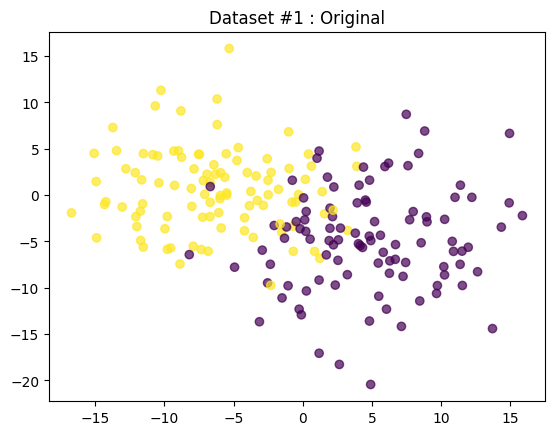

In [2]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

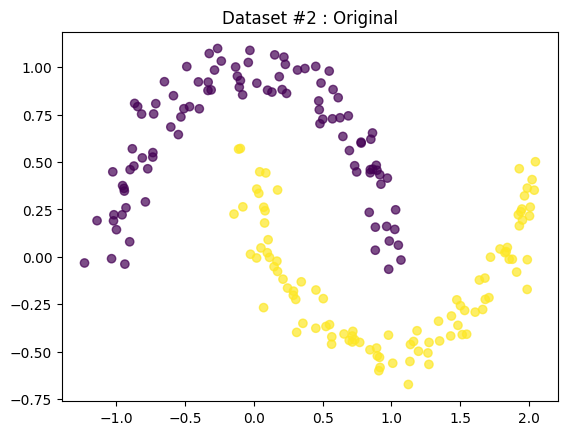

In [3]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

1.2. Apply k-means clustering and visualize:



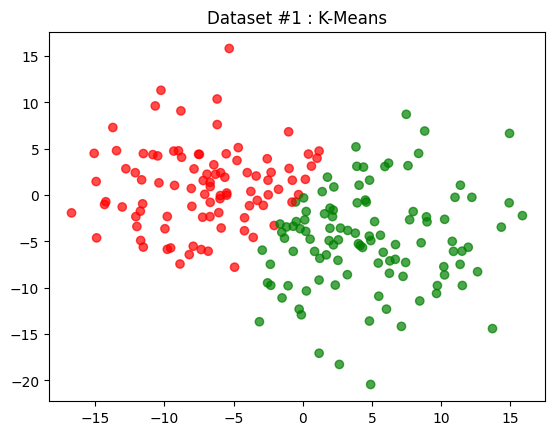

In [4]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123, n_init='auto')                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : K-Means')
plt.show()

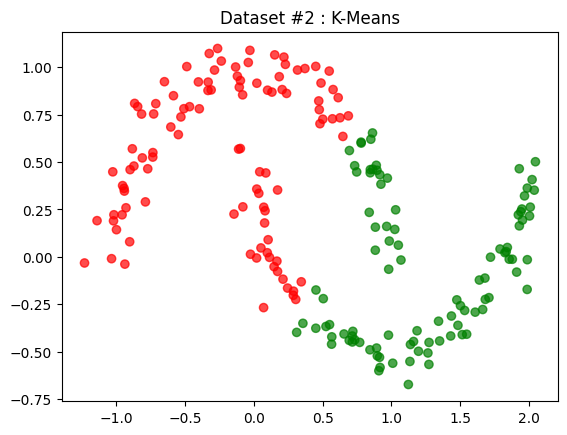

In [5]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X1.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

1.3. Apply agglomerative clustering and visualize:

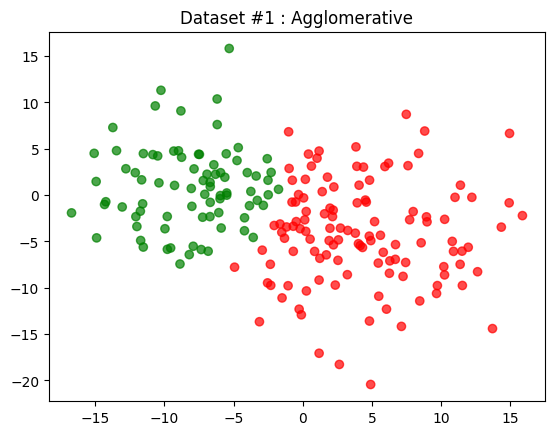

In [6]:
# Dataset #1 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : Agglomerative')
plt.show()

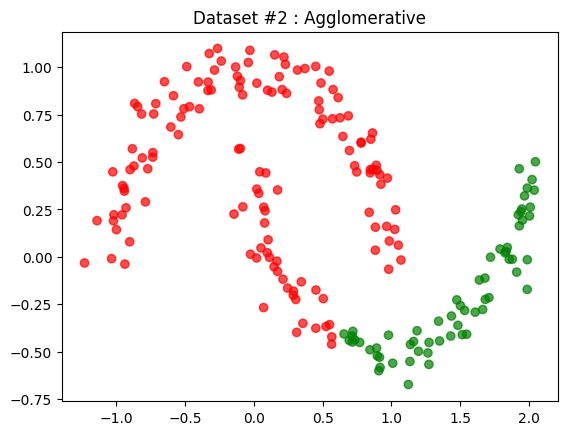

In [7]:
# Dataset #2 and two clusters.
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : Agglomerative')
plt.show()

1.4. Apply hierarchical clustering and visualize:

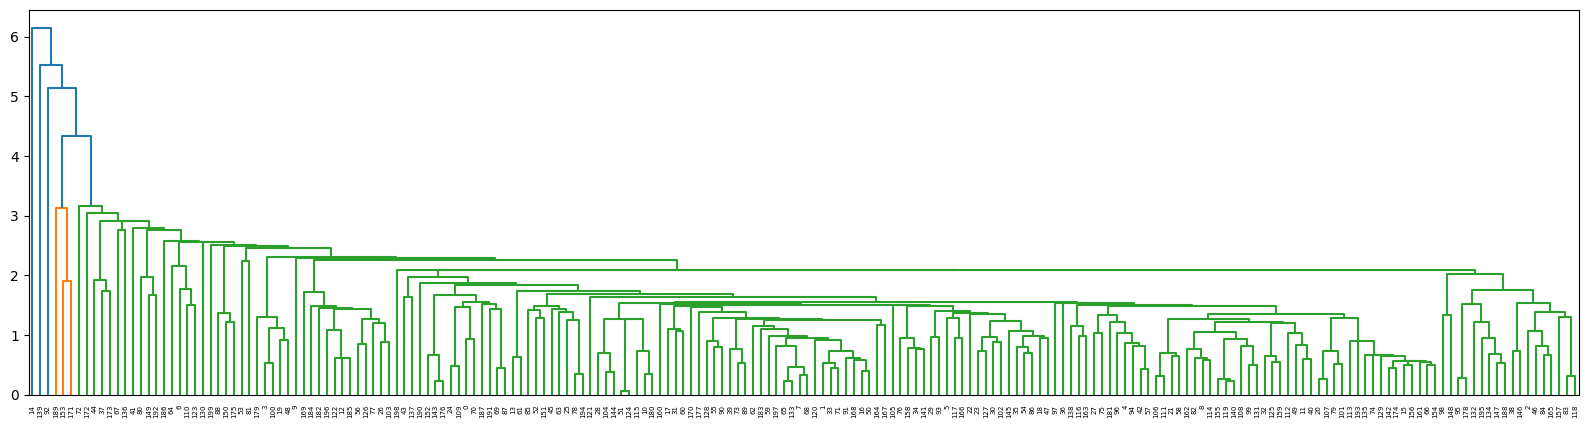

In [8]:
# Dataset #1 and show dendrogram.
myLinkage = linkage(X1,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [9]:
# Dataset #1 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 5, criterion='distance')                      #  Cut at the height (distance) = 5 <= change this value at will.
pd.Series(labels).value_counts()

,count
1,197
4,1
2,1
3,1


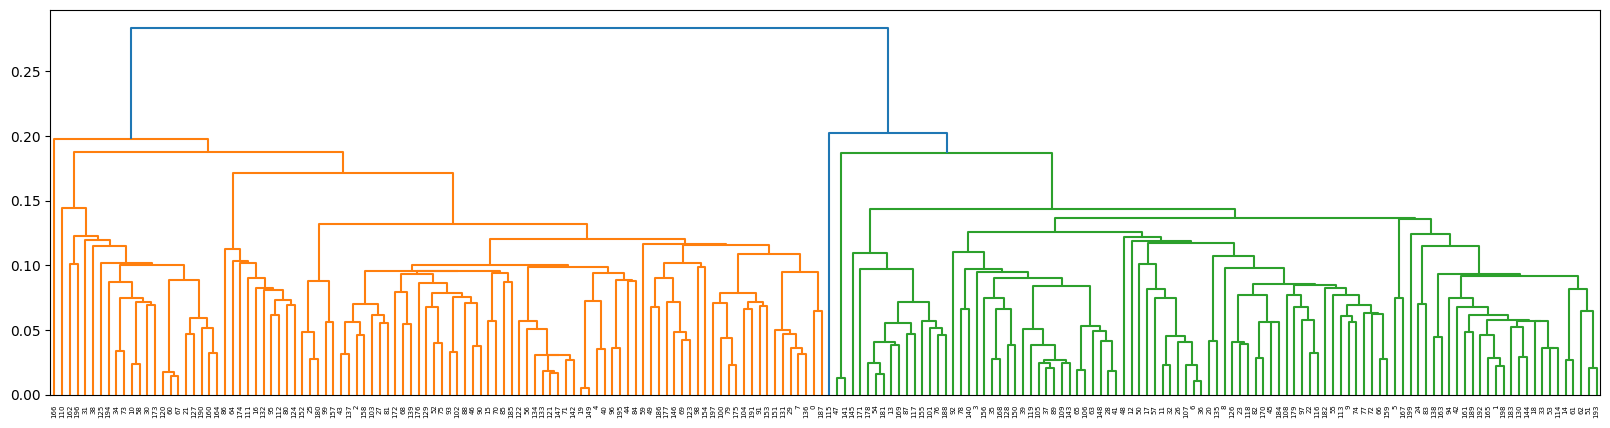

In [10]:
# Dataset #2 and show dendrogram.
myLinkage = linkage(X2,method='single')       # Cluster hierarchically using single linkage.
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [11]:
# Dataset #2 and clusters by cutting the dendrogram.
labels = fcluster(myLinkage, 0.23, criterion='distance')                      #  Cut at the height (distance) = 0.23 <= change this value at will.
pd.Series(labels).value_counts()

,count
1,100
2,100


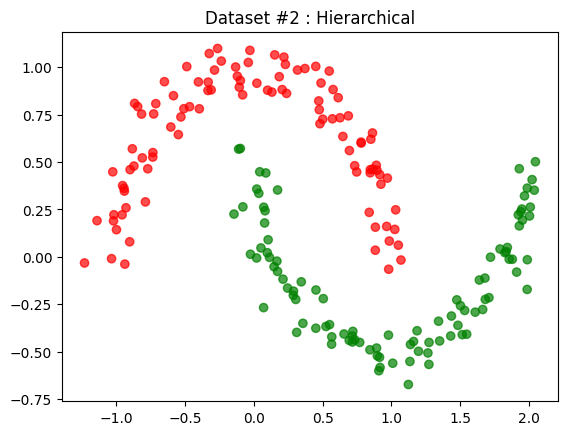

In [12]:
myColors = {1:'red',2:'green'}                                                # Define a color palette: 1~2.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : Hierarchical')
plt.show()

1.5. Apply DBSCAN and visualize:

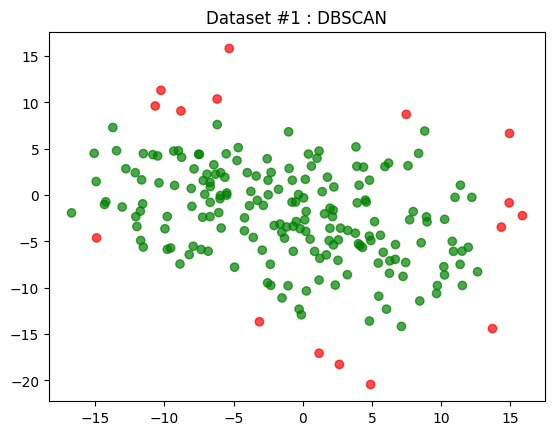

In [13]:
# Dataset #1.
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #1 : DBSCAN')
plt.show()

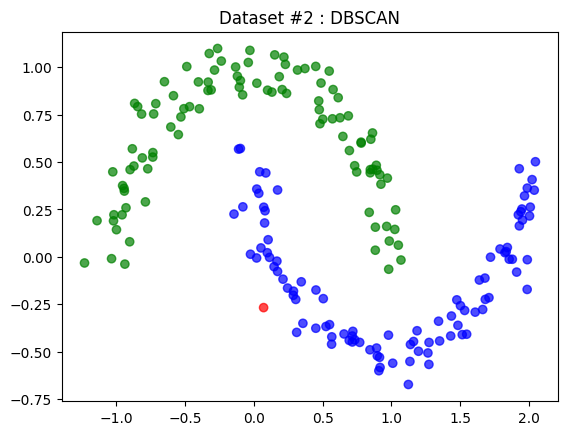

In [14]:
# Dataset #2.
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : DBSCAN')
plt.show()